In [36]:
from simple_net import *
from optimizer import GDOptimizer
from loss import MSELoss
import numpy as np


BATCH_SIZE = 256
FEATURE_SIZE = 16
MAX_ITER = 100

y_true = np.array([GradVal(x) for x in np.random.uniform(-1, 1, BATCH_SIZE)])
x = np.array([[GradVal(x) for x in np.random.uniform(-1, 1, FEATURE_SIZE)] for _ in range(BATCH_SIZE)])

pipeline = [SimpleLinearLayer(FEATURE_SIZE, FEATURE_SIZE * 2), SimpleReluLayer(), SimpleLinearLayer(FEATURE_SIZE * 2, FEATURE_SIZE), SimpleReluLayer(), SimpleLinearLayer(FEATURE_SIZE, 1)]
model = Model(pipeline=pipeline)
optimizer = GDOptimizer(model.parameters(), lr=1e-4)
mse = MSELoss()

for i in range(MAX_ITER+1):
    y_pred = model.forward(x)
    loss = mse.loss(y_pred=y_pred, y_true=y_true)
    loss.backward()
    optimizer.optimize()
    loss.zero_grad()
    if i % 25 == 0:
        print(f"MSE Loss: {loss.val:.3f} after {i} iters")


MSE Loss: 13.620 after 0 iters


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f19c255c920>>
Traceback (most recent call last):
  File "/home/kevin/anaconda3/envs/dev/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [6]:
from vector_net import *
from optimizer import GDOptimizer
from loss import MSELoss
from simple_net import Model

BATCH_SIZE = 256
FEATURE_SIZE = 16
MAX_ITER = 1000

y_true = GradVector(np.random.rand(BATCH_SIZE, 1))
x = GradVector(np.random.rand(BATCH_SIZE, FEATURE_SIZE))

pipeline = [VectorLinearLayer(FEATURE_SIZE, FEATURE_SIZE * 2), VectorReluLayer(), VectorLinearLayer(FEATURE_SIZE * 2, FEATURE_SIZE), VectorReluLayer(), VectorLinearLayer(FEATURE_SIZE, 1)]
model = Model(pipeline=pipeline)
optimizer = GDOptimizer(model.parameters(), lr=5e-5)
mse = MSELoss()

for i in range(MAX_ITER):
    y_pred = model.forward(x)
    loss = mse.loss(y_pred=y_pred, y_true=y_true)
    loss.backward()
    optimizer.optimize()
    loss.zero_grad()
    if i % 25 == 0:
        print(f"MSE Loss: {loss.val[0]} after {i} iters")


MSE Loss: [10.38086558] after 0 iters
MSE Loss: [7.85167729] after 25 iters
MSE Loss: [2.51663584] after 50 iters
MSE Loss: [3.11906137] after 75 iters
MSE Loss: [3.65041315] after 100 iters
MSE Loss: [1.09545718] after 125 iters
MSE Loss: [1.72054503] after 150 iters
MSE Loss: [2.24877235] after 175 iters
MSE Loss: [0.58899402] after 200 iters
MSE Loss: [0.15023333] after 225 iters
MSE Loss: [0.48753344] after 250 iters
MSE Loss: [0.75648127] after 275 iters
MSE Loss: [0.66975004] after 300 iters
MSE Loss: [0.40897664] after 325 iters
MSE Loss: [0.19083659] after 350 iters
MSE Loss: [0.14782601] after 375 iters
MSE Loss: [0.24472677] after 400 iters
MSE Loss: [0.36711576] after 425 iters
MSE Loss: [0.42014886] after 450 iters
MSE Loss: [0.37766243] after 475 iters
MSE Loss: [0.28171039] after 500 iters
MSE Loss: [0.18999999] after 525 iters
MSE Loss: [0.13151842] after 550 iters
MSE Loss: [0.11185761] after 575 iters
MSE Loss: [0.12066636] after 600 iters
MSE Loss: [0.1431276] after 6

In [28]:
from vector_net import *
from optimizer import GDOptimizer
from loss import MSELoss
from simple_net import Model
import torch
import numpy as np
from grad_vector import GradVector

BATCH_SIZE = 1024
MAX_ITER = 100


actual = np.random.rand(BATCH_SIZE, 1)
x = np.random.rand(BATCH_SIZE, 8)
layer1 = VectorLinearLayer(8, 16)
layer2 = VectorLinearLayer(16, 1)

t_actual = torch.tensor(actual, requires_grad=True)
data = torch.tensor(x, requires_grad=True)

weights1 = torch.tensor(layer1.weights.val, requires_grad=True)
weights2 = torch.tensor(layer2.weights.val, requires_grad=True)
bias1 = torch.tensor(layer1.bias.val, requires_grad=True)
bias2 = torch.tensor(layer2.bias.val, requires_grad=True)

res = data @ weights1 + bias1
res = res @ weights2 + bias2
t_diff = res - t_actual
torch_mse = (t_diff.T @ t_diff) / np.prod(t_diff.shape)  
torch_mse.backward()

res_gv = layer1(GradVector(x))
res_gv = layer2(res_gv)
gv_actual = GradVector(actual)
gv_diff = res_gv - gv_actual
gv_mse = (gv_diff.T() @ gv_diff) / np.prod(gv_diff.shape)
gv_mse.backward()

In [24]:
weights1.grad.allclose(torch.tensor(layer1.weights.gradient))

False

In [25]:
bias1.grad.allclose(torch.tensor(layer1.bias.gradient))

False

In [26]:
torch_mse

tensor([[23.2031]], dtype=torch.float64, grad_fn=<DivBackward0>)

In [27]:
gv_mse

[[23.2030859]]

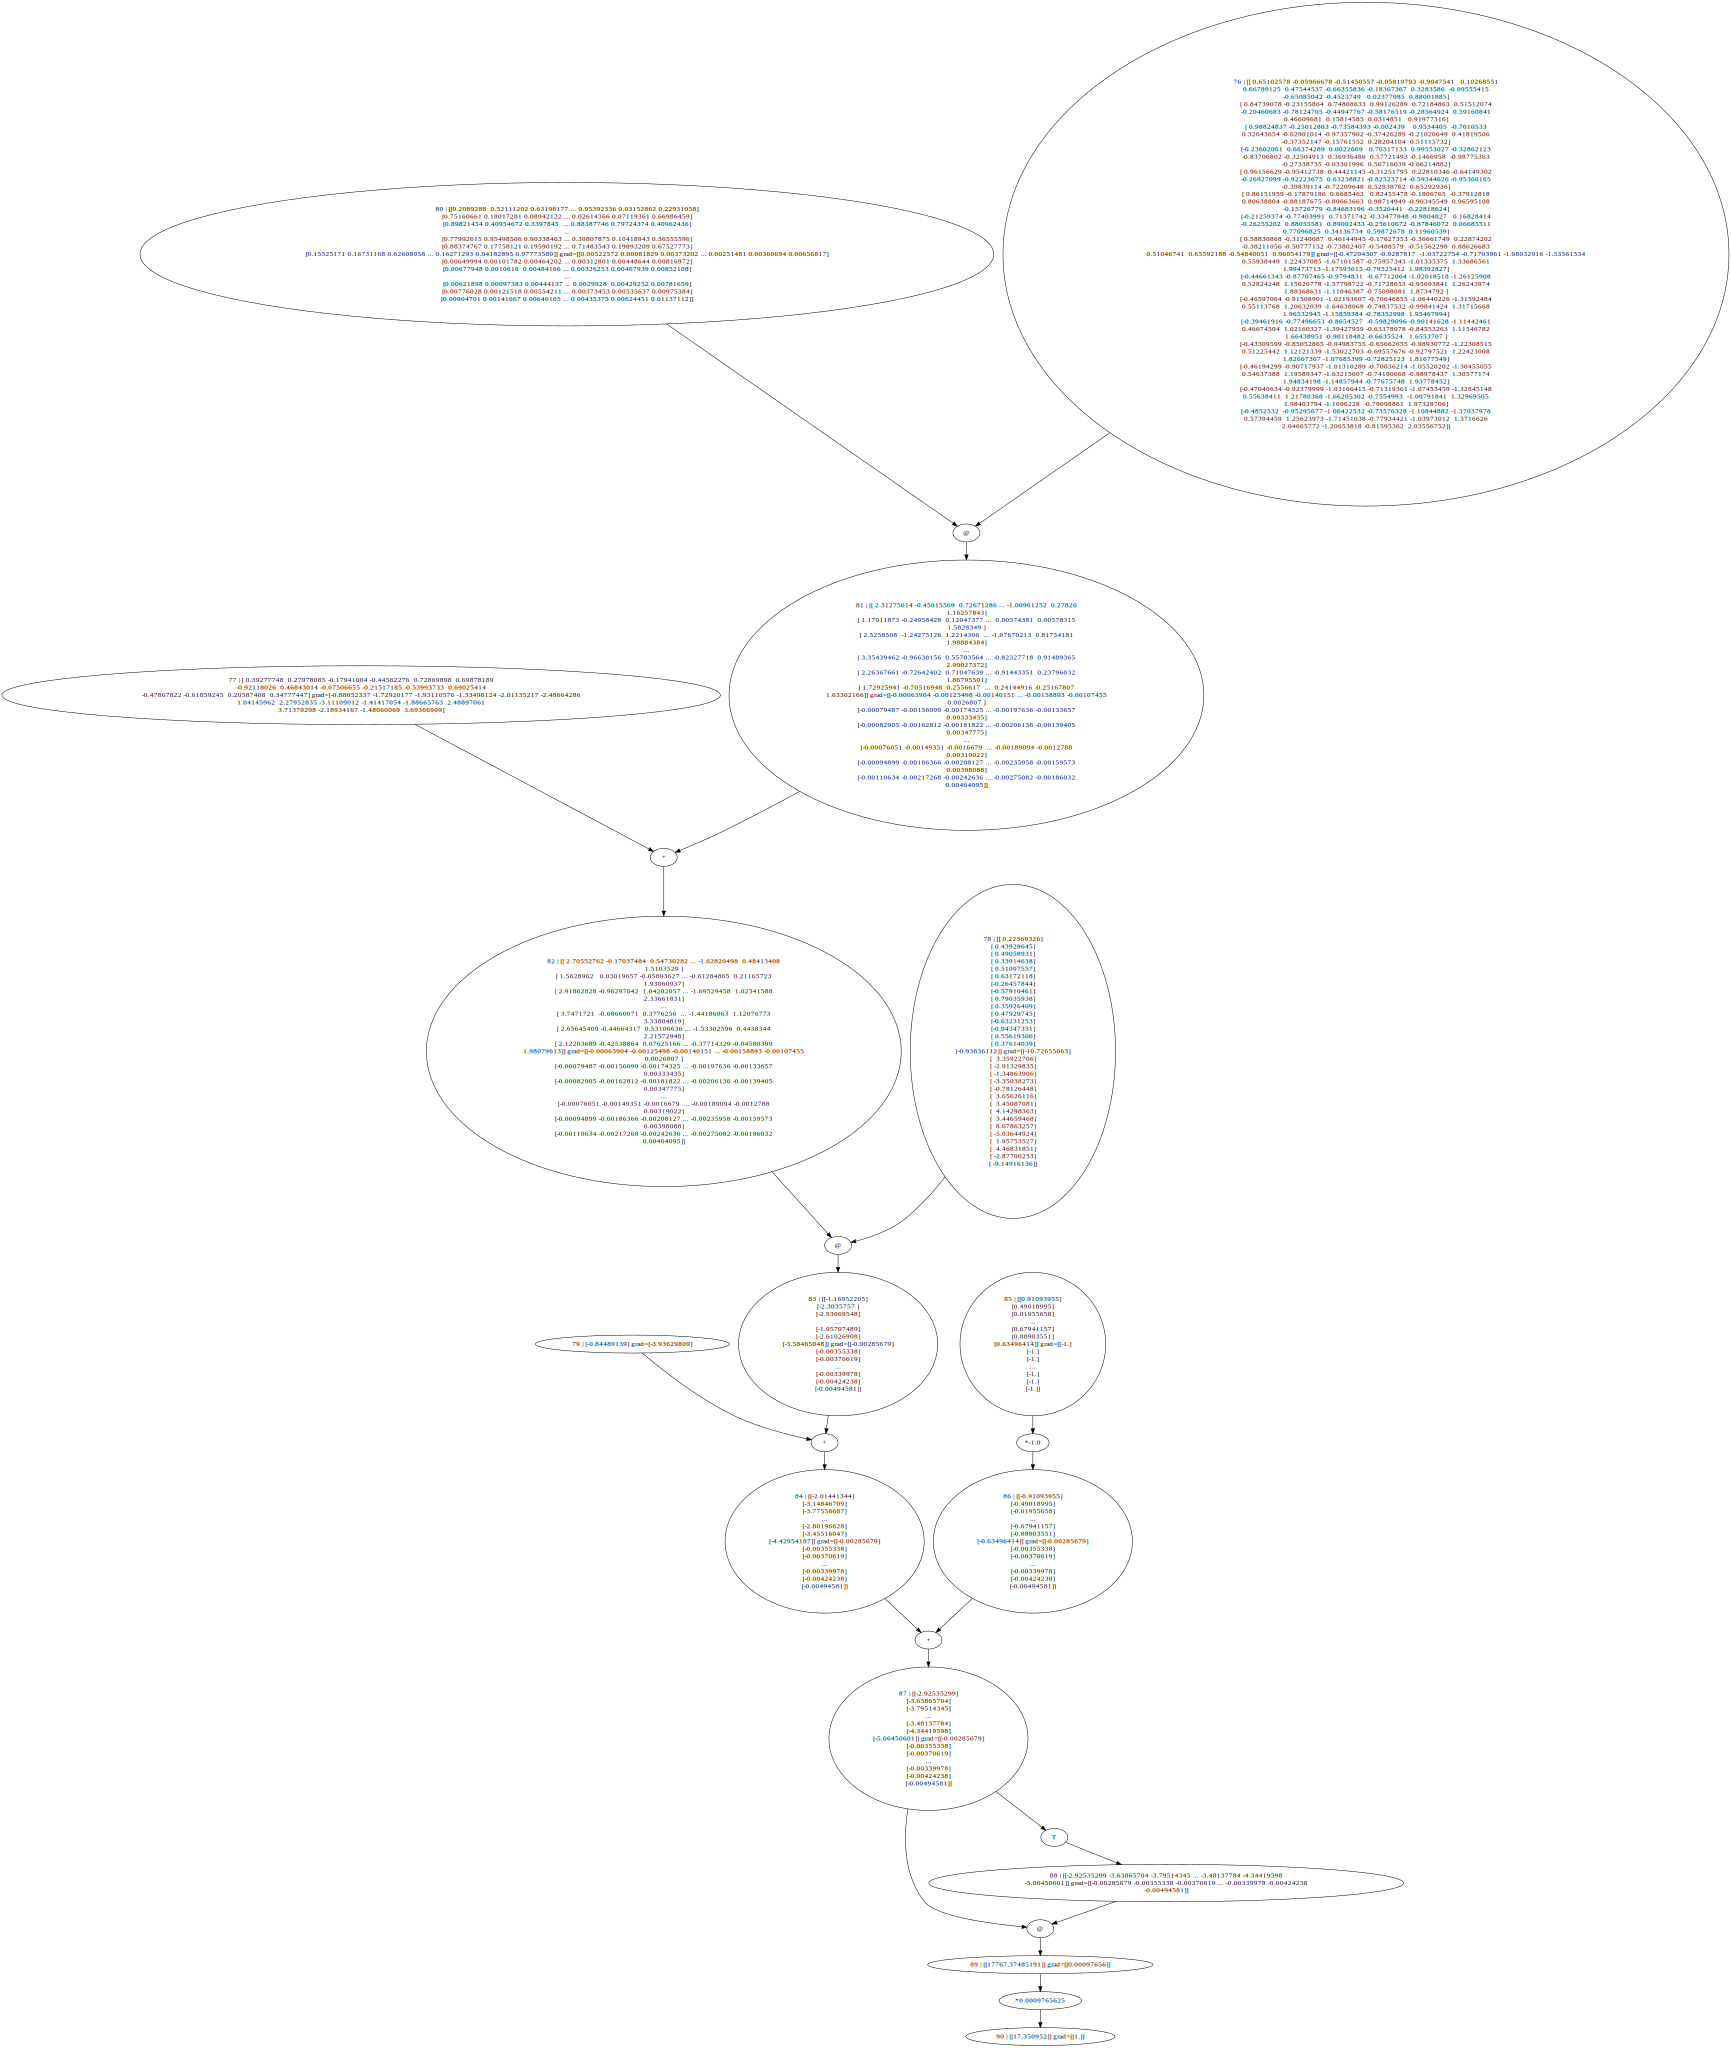

In [29]:
gv_mse.visualize()